In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
from scipy.stats import norm

#skleran libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn import linear_model, preprocessing

try:
    from sklearn.preprocessing import PolynomialFeatures
    from sklearn.pipeline import make_pipeline
except ImportError:
    # use backports for sklearn 1.4
    from sklearn_backports import PolynomialFeatures
    from sklearn_backports import make_pipeline

%matplotlib inline

### Data  Collecting

In [2]:
data_p = pd.read_csv('./dataset_pisascore.csv')
data_p.head()

,Country,read,math,science,GPI,CPI,cd,ss,md,egdp,egov,myos,cm,democracy
0,Australia,502.63,491.36,502.96,1.44,77,1.18,1.50,1.69,5.3,13.8,12.21,1,9.09
1,Austria,484.39,498.94,489.78,1.27,76,1.08,1.37,1.39,5.5,11.0,12.30,1,8.42
2,Belgium,492.86,508.07,498.77,1.56,75,1.21,1.84,1.57,6.5,12.3,11.92,1,7.78
3,Canada,520.09,512.02,518.00,1.37,81,1.19,1.43,1.54,5.3,12.2,13.80,1,9.15
4,Chile,452.27,417.41,443.58,1.65,67,1.00,2.11,1.76,5.4,21.3,10.60,2,7.84


In [3]:
data_p.shape

(67, 14)

In [4]:
data_p['pisa_score'] = (data_p['read']+data_p['math']+data_p['science'])/3
data_p.head(10)

,Country,read,math,science,GPI,CPI,cd,ss,md,egdp,egov,myos,cm,democracy,pisa_score
0,Australia,502.63,491.36,502.96,1.44,77,1.18,1.50,1.69,5.3,13.8,12.21,1,9.09,498.983333
1,Austria,484.39,498.94,489.78,1.27,76,1.08,1.37,1.39,5.5,11.0,12.30,1,8.42,491.036667
2,Belgium,492.86,508.07,498.77,1.56,75,1.21,1.84,1.57,6.5,12.3,11.92,1,7.78,499.900000
3,Canada,520.09,512.02,518.00,1.37,81,1.19,1.43,1.54,5.3,12.2,13.80,1,9.15,516.703333
4,Chile,452.27,417.41,443.58,1.65,67,1.00,2.11,1.76,5.4,21.3,10.60,2,7.84,437.753333
5,Colombia,412.30,390.93,413.32,2.73,36,2.20,3.43,2.23,4.5,16.3,8.06,2,6.67,405.516667
6,Czech Republic,490.22,499.47,496.79,1.38,59,1.08,1.63,1.34,5.6,14.2,12.84,1,7.62,495.493333
7,Denmark,501.13,509.40,492.64,1.35,88,1.42,1.29,1.35,7.6,13.8,12.43,1,9.22,501.056667
8,Estonia,523.02,523.41,530.11,1.73,73,1.50,1.99,1.58,5.2,13.1,12.90,1,7.79,525.513333
9,Finland,520.08,507.30,521.88,1.51,85,1.30,1.43,1.97,6.9,12.3,14.20,1,9.03,516.420000


In [5]:
data_p = data_p.drop(['Country','read', 'math', 'science'], axis=1)
data_p.head(10)

,GPI,CPI,cd,ss,md,egdp,egov,myos,cm,democracy,pisa_score
0,1.44,77,1.18,1.50,1.69,5.3,13.8,12.21,1,9.09,498.983333
1,1.27,76,1.08,1.37,1.39,5.5,11.0,12.30,1,8.42,491.036667
2,1.56,75,1.21,1.84,1.57,6.5,12.3,11.92,1,7.78,499.900000
3,1.37,81,1.19,1.43,1.54,5.3,12.2,13.80,1,9.15,516.703333
4,1.65,67,1.00,2.11,1.76,5.4,21.3,10.60,2,7.84,437.753333
5,2.73,36,2.20,3.43,2.23,4.5,16.3,8.06,2,6.67,405.516667
6,1.38,59,1.08,1.63,1.34,5.6,14.2,12.84,1,7.62,495.493333
7,1.35,88,1.42,1.29,1.35,7.6,13.8,12.43,1,9.22,501.056667
8,1.73,73,1.50,1.99,1.58,5.2,13.1,12.90,1,7.79,525.513333
9,1.51,85,1.30,1.43,1.97,6.9,12.3,14.20,1,9.03,516.420000


In [6]:
data_p.describe()

,GPI,CPI,cd,ss,md,egdp,egov,myos,cm,democracy,pisa_score
count,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000,67.000000
mean,1.872836,55.522388,1.579254,2.122687,1.856119,4.743731,13.723433,11.034328,1.746269,6.840896,456.296866
std,0.463291,18.846556,0.562385,0.583858,0.503208,1.365186,4.176010,1.938844,1.077923,1.895454,52.969082
min,1.100000,25.000000,1.000000,1.170000,1.050000,2.000000,6.900000,4.800000,1.000000,1.930000,334.120000
25%,1.530000,38.500000,1.195000,1.635000,1.575000,3.800000,11.000000,9.805000,1.000000,6.150000,414.066667
50%,1.820000,56.000000,1.440000,2.110000,1.740000,4.800000,13.100000,11.200000,1.000000,7.080000,469.396667
75%,2.085000,73.000000,1.840000,2.430000,2.060000,5.450000,16.050000,12.555000,2.000000,7.980000,499.441667
max,3.160000,88.000000,3.490000,3.430000,3.910000,8.000000,28.500000,14.200000,6.000000,9.870000,579.026667


### Data Exploration 

In [7]:
corr = data_p.corr(method='pearson')
corr

,GPI,CPI,cd,ss,md,egdp,egov,myos,cm,democracy,pisa_score
GPI,1.000000,-0.680298,0.888101,0.904051,0.627720,-0.328506,-0.028498,-0.469948,0.410748,-0.626686,-0.442057
CPI,-0.680298,1.000000,-0.554317,-0.824150,-0.071692,0.554655,0.073198,0.656311,-0.592273,0.718058,0.684414
cd,0.888101,-0.554317,1.000000,0.697589,0.449492,-0.250276,-0.095228,-0.306398,0.311607,-0.586697,-0.246389
ss,0.904051,-0.824150,0.697589,1.000000,0.354573,-0.408876,0.033685,-0.645435,0.573597,-0.612321,-0.647796
md,0.627720,-0.071692,0.449492,0.354573,1.000000,-0.045373,-0.022726,-0.021101,-0.061899,-0.251313,0.001657
egdp,-0.328506,0.554655,-0.250276,-0.408876,-0.045373,1.000000,0.325436,0.328280,-0.412739,0.558832,0.390784
egov,-0.028498,0.073198,-0.095228,0.033685,-0.022726,0.325436,1.000000,-0.189877,0.352846,0.045228,-0.164720
myos,-0.469948,0.656311,-0.306398,-0.645435,-0.021101,0.328280,-0.189877,1.000000,-0.607724,0.494404,0.632329
cm,0.410748,-0.592273,0.311607,0.573597,-0.061899,-0.412739,0.352846,-0.607724,1.000000,-0.431558,-0.692032
democracy,-0.626686,0.718058,-0.586697,-0.612321,-0.251313,0.558832,0.045228,0.494404,-0.431558,1.000000,0.437062


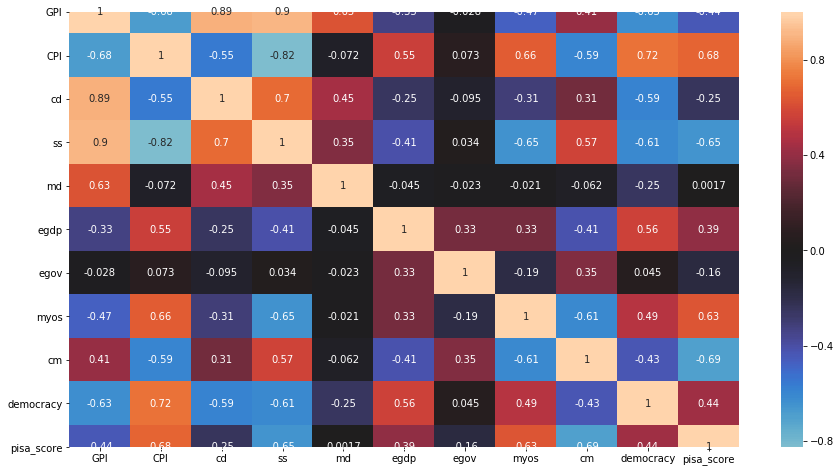

In [8]:
plt.subplots(figsize=(15, 8))
sns.heatmap(data=corr, center=0, annot=True)

In [9]:
data_p = data_p.drop(['cd','md', 'ss','egov'], axis=1)

### Treatment Outliers

In [10]:
data_p.head()

,GPI,CPI,egdp,myos,cm,democracy,pisa_score
0,1.44,77,5.3,12.21,1,9.09,498.983333
1,1.27,76,5.5,12.30,1,8.42,491.036667
2,1.56,75,6.5,11.92,1,7.78,499.900000
3,1.37,81,5.3,13.80,1,9.15,516.703333
4,1.65,67,5.4,10.60,2,7.84,437.753333


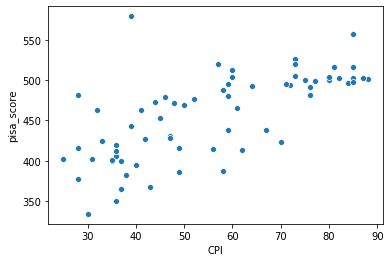

In [11]:
sns.scatterplot(x="CPI", y="pisa_score", data=data_p)

In [12]:
data_p.shape

(67, 7)

In [13]:
data_p = data_p.drop(data_p[(data_p['pisa_score'] >550) | (data_p['pisa_score'] <350)].index)

In [14]:
z = np.abs(stats.zscore(data_p))
print(np.where(z > 3))

(array([45, 51, 60], dtype=int64), array([4, 3, 4], dtype=int64))


In [15]:
data_p = data_p[(z<3).all(axis=1)]

### Check Correlation

In [16]:
corr = data_p.corr(method='pearson')
corr

,GPI,CPI,egdp,myos,cm,democracy,pisa_score
GPI,1.000000,-0.665135,-0.328922,-0.494390,0.456436,-0.640217,-0.474539
CPI,-0.665135,1.000000,0.575409,0.656838,-0.632379,0.746721,0.724060
egdp,-0.328922,0.575409,1.000000,0.302475,-0.406920,0.597014,0.426542
myos,-0.494390,0.656838,0.302475,1.000000,-0.562334,0.454883,0.713316
cm,0.456436,-0.632379,-0.406920,-0.562334,1.000000,-0.535881,-0.759174
democracy,-0.640217,0.746721,0.597014,0.454883,-0.535881,1.000000,0.606606
pisa_score,-0.474539,0.724060,0.426542,0.713316,-0.759174,0.606606,1.000000


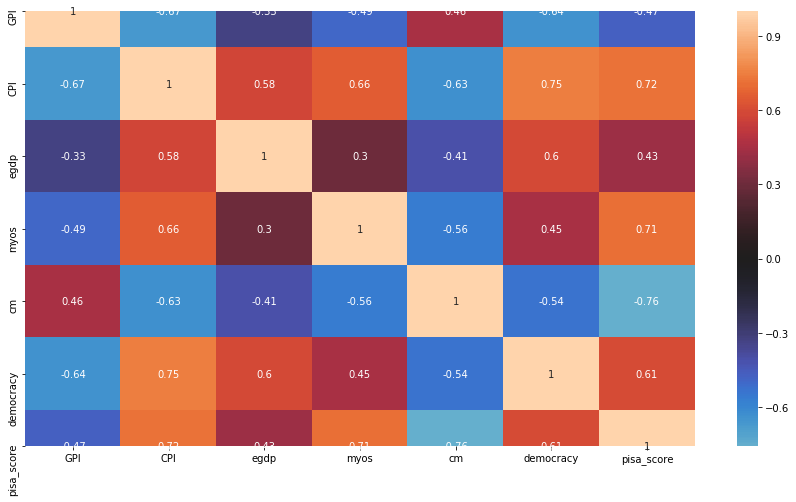

In [17]:
plt.subplots(figsize=(15, 8))
sns.heatmap(data=corr, center=0, annot=True)

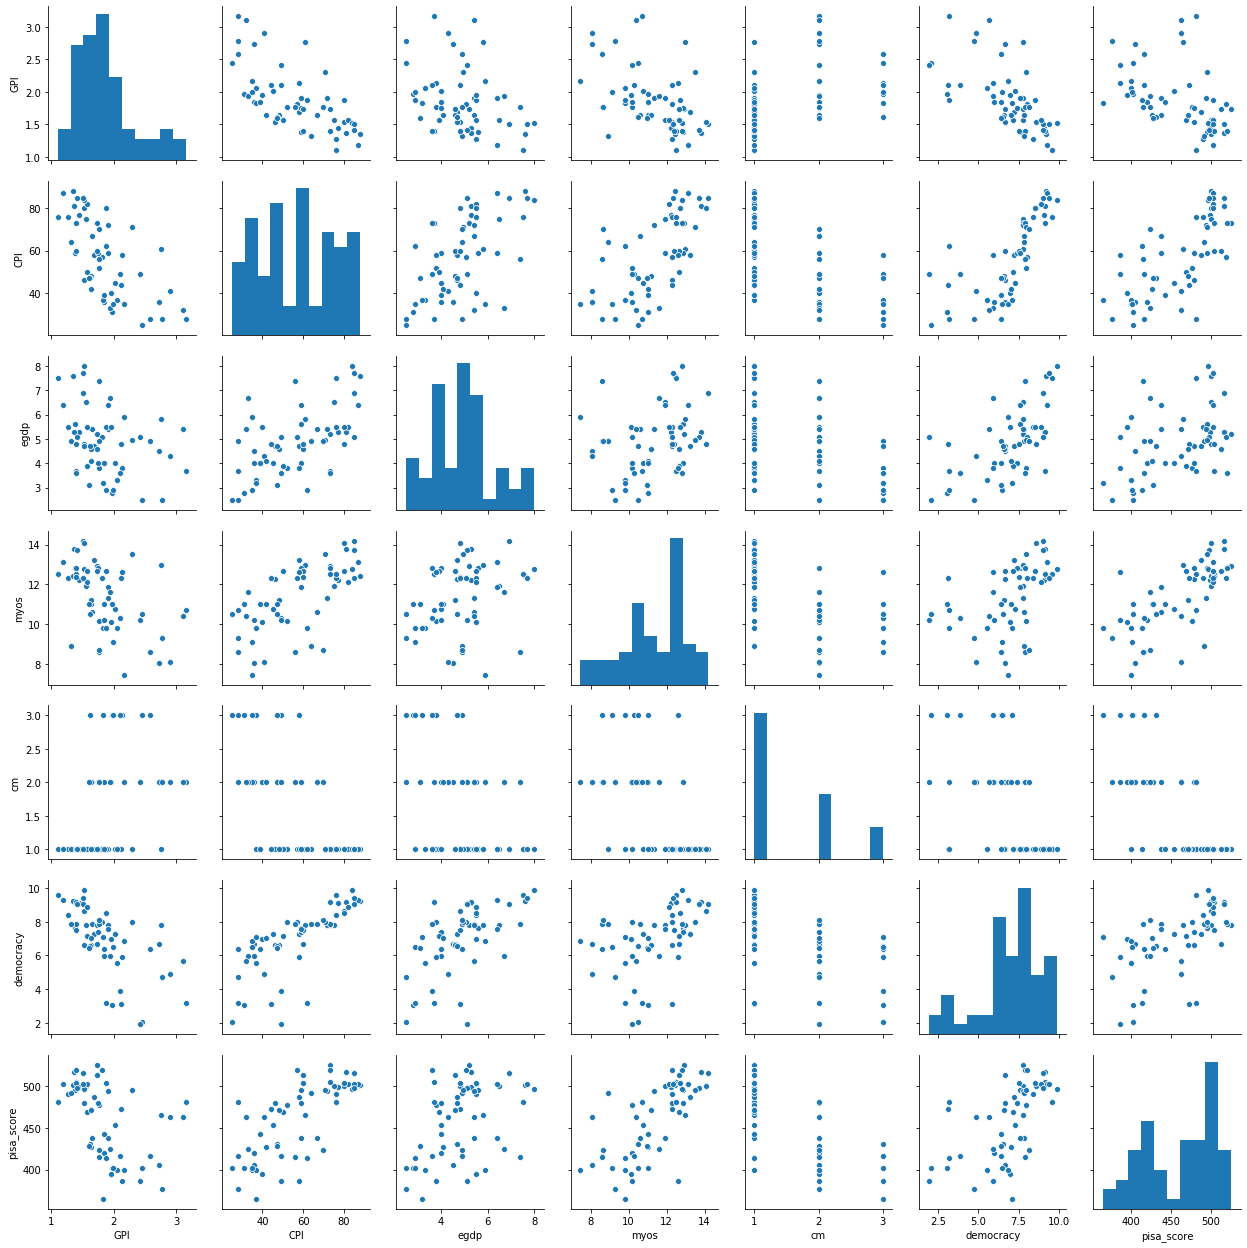

In [18]:
sns.pairplot(data_p)

### Investigation of Target Variable


 mean = 459.84 and std dev = 44.30



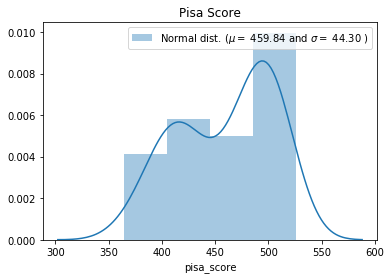

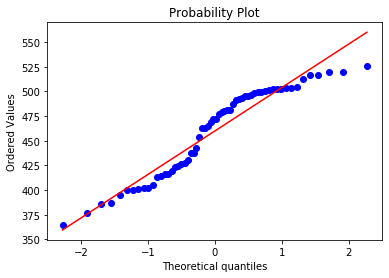

In [19]:
sns.distplot(data_p['pisa_score']).set_title("Pisa Score")
(mu, sigma) = norm.fit(data_p['pisa_score'])
print( '\n mean = {:.2f} and std dev = {:.2f}\n'.format(mu, sigma))

#NPlotting the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
fig = plt.figure()
res = stats.probplot(data_p['pisa_score'], plot=plt)

### Linear Regression

In [20]:
X = pd.DataFrame(np.c_[data_p['GPI'], data_p['CPI'], data_p['egdp'], data_p['myos'], data_p['cm'], data_p['democracy']], columns=['GPI', 'CPI','egdp','myos', 'cm', 'democracy'])
Y = data_p['pisa_score']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=9)

In [22]:
lin_reg_mod = linear_model.LinearRegression()
lin_reg_mod.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [23]:
lin_reg_mod.coef_

array([ 14.00481264,   0.48279132,  -0.51639503,   8.85841025,
       -25.88428197,   5.43298868])

In [24]:
pred = lin_reg_mod.predict(X_test)

In [25]:
test_set_rmse = (np.sqrt(mean_squared_error(y_test, pred)))
test_set_r2 = r2_score(y_test, pred)

In [26]:
print(test_set_rmse)
print(test_set_r2)

15.525437525520243
0.8569229786562585


<function matplotlib.pyplot.show(*args, **kw)>

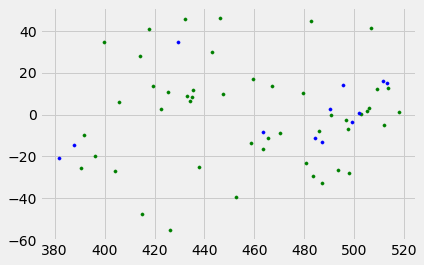

In [30]:
plt.style.use('fivethirtyeight')
plt.scatter(lin_reg_mod.predict(X_train), lin_reg_mod.predict(X_train) - y_train, color="green", s=10, label='Train data')
plt.scatter(lin_reg_mod.predict(X_test), lin_reg_mod.predict(X_test) - y_test, color="blue", s=10, label='Test data')
plt.show